#### Import the required packages with their customary aliases

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [157]:
covidzip_df =pd.read_csv('../data/COVID_CountByZipPerDate 03292021.csv')
covidzip_df.head()

,Specimen Collection Date,Zip,Cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1


In [158]:
covidzip_df.info

<bound method DataFrame.info of      Specimen Collection Date      Zip  Cases
0                    3/6/2020  37217.0      1
1                   3/10/2020  37214.0      1
2                   3/11/2020  37013.0      1
3                   3/11/2020  37204.0      2
4                   3/11/2020  37205.0      1
...                       ...      ...    ...
8827                3/27/2021  37210.0      1
8828                3/27/2021  37211.0      1
8829                3/27/2021  37212.0      1
8830                3/27/2021  37214.0      2
8831                3/27/2021  37221.0      2

[8832 rows x 3 columns]>

In [159]:
covidzip_df.dtypes

Specimen Collection Date     object
Zip                         float64
Cases                         int64
dtype: object

In [160]:
covidzip_df[covidzip_df['Zip'].isnull()]

,Specimen Collection Date,Zip,Cases
9,3/12/2020,NaN,1
17,3/13/2020,NaN,3
31,3/14/2020,NaN,5
40,3/15/2020,NaN,6
50,3/16/2020,NaN,10
...,...,...,...
8711,3/23/2021,NaN,13
8737,3/24/2021,NaN,19
8765,3/25/2021,NaN,8
8791,3/26/2021,NaN,5


In [161]:
covidzip_df['Zip'] = covidzip_df['Zip'].astype('Int64').astype(str)
covidzip_df.dtypes

Specimen Collection Date    object
Zip                         object
Cases                        int64
dtype: object

In [162]:
covidzip_df.tail(20)

,Specimen Collection Date,Zip,Cases
8812,3/26/2021,37216,1
8813,3/26/2021,37217,2
8814,3/26/2021,37218,1
8815,3/26/2021,37220,3
8816,3/26/2021,37221,7
8817,3/26/2021,37228,1
8818,3/27/2021,<NA>,1
8819,3/27/2021,37013,1
8820,3/27/2021,37072,1
8821,3/27/2021,37115,1


In [163]:
covidzip_df.info

<bound method DataFrame.info of      Specimen Collection Date    Zip  Cases
0                    3/6/2020  37217      1
1                   3/10/2020  37214      1
2                   3/11/2020  37013      1
3                   3/11/2020  37204      2
4                   3/11/2020  37205      1
...                       ...    ...    ...
8827                3/27/2021  37210      1
8828                3/27/2021  37211      1
8829                3/27/2021  37212      1
8830                3/27/2021  37214      2
8831                3/27/2021  37221      2

[8832 rows x 3 columns]>

In [164]:
v_protocol_df =pd.io.parsers.read_csv('../data/vaccine_with_protocol.csv')
v_protocol_df.head()

,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot


In [165]:
v_protocol_df.dtypes

vacc_date       object
zipcode        float64
count_given    float64
dose_nbr       float64
protocol        object
dtype: object

In [166]:
v_protocol_df['zipcode'] = v_protocol_df['zipcode'].astype('Int64').astype(str)
v_protocol_df.dtypes

vacc_date       object
zipcode         object
count_given    float64
dose_nbr       float64
protocol        object
dtype: object

In [167]:
v_protocol_df.info

<bound method DataFrame.info of        vacc_date zipcode  count_given  dose_nbr  protocol
0     2020-12-12   37215          1.0       1.0  two-shot
1     2020-12-14   37205          1.0       2.0  two-shot
2     2020-12-14   37215          1.0       1.0  two-shot
3     2020-12-15   37221          1.0       1.0  two-shot
4     2020-12-16   37215          1.0       1.0  two-shot
...          ...     ...          ...       ...       ...
6689  2021-04-07   37228          9.0       1.0  two-shot
6690  2021-04-07   37228          2.0       2.0  two-shot
6691  2021-04-07    <NA>          8.0       1.0  two-shot
6692  2021-04-07    <NA>          1.0       1.0  one-shot
6693  2021-04-07    <NA>          7.0       2.0  two-shot

[6694 rows x 5 columns]>

In [168]:
covidzip_df['Zip'].value_counts()

37013    382
37211    379
<NA>     376
37209    364
37217    362
37207    361
37115    361
37076    357
37214    355
37203    344
37221    342
37206    340
37208    338
37072    338
37210    336
37205    330
37138    323
37218    321
37216    318
37215    317
37212    313
37204    306
37220    214
37189    211
37080    192
37228    168
37201    153
37219    140
37027    132
37213     43
37069     13
37238      3
Name: Zip, dtype: int64

In [169]:
covid_by_zip_df = covidzip_df.groupby('Zip')

covid_by_zip_df.describe()

Cases                                                     
       count       mean        std  min   25%   50%    75%    max
Zip                                                              
37013  382.0  34.958115  33.469041  1.0  13.0  24.0  45.00  215.0
37027  132.0   1.750000   1.231737  1.0   1.0   1.0   2.00    7.0
37069   13.0   1.230769   0.599145  1.0   1.0   1.0   1.00    3.0
37072  338.0   8.828402   9.351692  1.0   3.0   5.5  12.00   59.0
37076  357.0  11.985994  11.779449  1.0   3.0   8.0  16.00   61.0
37080  192.0   2.989583   2.594778  1.0   1.0   2.0   4.00   14.0
37115  361.0  12.670360  11.707995  1.0   4.0   9.0  17.00   82.0
37138  323.0   7.303406   8.020600  1.0   2.0   5.0   9.00   43.0
37189  211.0   2.270142   1.736995  1.0   1.0   2.0   3.00   12.0
37201  153.0   1.954248   1.268753  1.0   1.0   2.0   2.00    7.0
37203  344.0   9.726744   9.460723  1.0   3.0   6.0  14.00   69.0
37204  306.0   5.836601   5.044663  1.0   2.0   4.0   8.00   24.0
37205  330.0   7.775758   7.977439  1.0   2.0   5.0  10.00   48.0
37206  340.0   9.152941   8.973913  1.0   3.0   6.0  13.00   51.0
37207  361.0  13.099723  12.212063  1.0   4.0   9.0  17.00   66.0
37208  338.0   7.183432   6.990164  1.0   2.0   5.0  11.00   38.0
37209  364.0  13.934066  13.013493  1.0   4.0   9.0  19.00   73.0
37210  336.0   6.250000   6.088158  1.0   2.0   4.0   8.00   38.0
37211  379.0  27.000000  25.454389  1.0   9.0  18.0  36.00  159.0
37212  313.0   5.824281   5.163772  1.0   2.0   4.0   8.00   43.0
37213   43.0   1.511628   1.334025  1.0   1.0   1.0   1.50    9.0
37214  355.0   9.881690  10.472864  1.0   3.0   6.0  13.00   66.0
37215  317.0   7.690852   6.949570  1.0   2.0   6.0  11.00   41.0
37216  318.0   6.323899   5.906644  1.0   2.0   4.0   9.00   31.0
37217  362.0  10.792818   9.774672  1.0   4.0   8.0  14.00   68.0
37218  321.0   5.560748   5.538238  1.0   2.0   4.0   7.00   47.0
37219  140.0   1.928571   1.520332  1.0   1.0   1.0   2.00   11.0
37220  214.0   3.065421   2.465808  1.0   1.0   2.0   4.00   14.0
37221  342.0  11.432749  11.967938  1.0   3.0   7.0  15.00   65.0
37228  168.0   1.845238   1.168386  1.0   1.0   1.0   2.00    6.0
37238    3.0   1.000000   0.000000  1.0   1.0   1.0   1.00    1.0
<NA>   376.0  22.372340  31.370299  1.0   5.0  12.0  25.25  272.0

In [170]:
covidzip_df[covidzip_df['Zip'].isnull()]

,Specimen Collection Date,Zip,Cases


There are 376 rows that do not have ZIP data out of 8832 rows

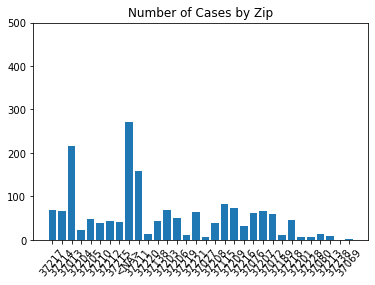

In [171]:
plt.ylim(0, 500)
#plt.figure(figsize=(10, 6))
plt.bar('Zip', 'Cases', data = covidzip_df )
plt.xticks(rotation = 50)
plt.title('Number of Cases by Zip');
# the semi-colon supresses the output line

In [172]:
v_protocol_df[v_protocol_df['zipcode'].isnull()]

,vacc_date,zipcode,count_given,dose_nbr,protocol


There are 232 rows that has NA or NULL zipcodes in the Vaccine Protocol data

In [120]:
vaccine_df_by_zip = v_protocol_df.groupby('zipcode')
vaccine_df_by_zip.describe()


count_given                                                            \
              count        mean         std  min    25%    50%     75%    max   
zipcode                                                                         
37013         235.0  115.604255  104.491692  1.0  37.00   83.0  150.00  563.0   
37027         124.0    4.080645    4.115402  1.0   2.00    3.0    5.00   28.0   
37069          58.0    1.534483    0.799463  1.0   1.00    1.0    2.00    4.0   
37072         239.0   54.845188   45.495741  1.0  17.00   44.0   80.50  201.0   
37076         237.0   71.118143   65.830506  1.0  24.00   53.0   98.00  349.0   
37080         217.0   14.184332   11.757706  1.0   5.00   11.0   21.00   53.0   
37115         238.0   53.894958   51.370844  1.0  15.25   36.0   76.75  269.0   
37138         234.0   46.465812   38.616872  1.0  17.25   37.0   65.75  173.0   
37189         215.0    7.674419    7.056252  1.0   3.00    6.0   11.00   41.0   
37201         183.0    4.131148    4.243193  1.0   1.00    2.0    5.00   27.0   
37203         238.0   49.067227   47.451193  1.0  16.00   36.0   65.00  268.0   
37204         239.0   40.682008   34.127408  1.0  14.00   34.0   54.50  194.0   
37205         241.0  101.456432   73.485991  1.0  44.00   99.0  146.00  473.0   
37206         238.0   60.126050   70.871019  1.0  19.00   37.5   70.75  622.0   
37207         239.0   58.108787   56.203755  1.0  18.00   39.0   83.00  440.0   
37208         232.0   35.612069   33.137852  1.0  12.00   26.0   50.00  228.0   
37209         240.0   85.637500   70.999660  1.0  34.00   67.5  117.00  388.0   
37210         231.0   23.779221   33.082488  1.0   8.00   13.0   27.00  283.0   
37211         242.0  117.673554  111.226643  1.0  43.25   79.0  157.25  586.0   
37212         235.0   46.285106   38.878284  1.0  19.00   38.0   64.00  215.0   
37213          68.0    1.500000    0.889407  1.0   1.00    1.0    2.00    5.0   
37214         237.0   57.270042   53.203826  1.0  20.00   41.0   78.00  395.0   
37215         247.0   80.627530   60.829488  1.0  31.00   72.0  123.00  292.0   
37216         237.0   43.261603   48.406637  1.0  13.00   28.0   55.00  390.0   
37217         232.0   37.125000   34.900190  1.0  12.00   24.0   49.25  190.0   
37218         227.0   30.779736   30.522224  1.0   9.00   20.0   47.00  190.0   
37219         194.0    4.592784    4.332567  1.0   2.00    3.0    6.00   36.0   
37220         228.0   22.763158   16.417356  1.0   9.00   21.0   33.00   74.0   
37221         240.0  115.091667   82.740457  1.0  57.75  102.0  167.00  406.0   
37228         184.0    5.652174    9.200184  1.0   2.00    4.0    7.00   85.0   
37238           5.0    1.000000    0.000000  1.0   1.00    1.0    1.00    1.0   
<NA>          232.0   26.198276   27.082436  1.0   5.00   15.0   43.00  132.0   

        dose_nbr                                               
           count      mean       std  min  25%  50%  75%  max  
zipcode                                                        
37013      235.0  1.400000  0.490944  1.0  1.0  1.0  2.0  2.0  
37027      124.0  1.379032  0.487114  1.0  1.0  1.0  2.0  2.0  
37069       58.0  1.413793  0.496814  1.0  1.0  1.0  2.0  2.0  
37072      239.0  1.397490  0.490406  1.0  1.0  1.0  2.0  2.0  
37076      237.0  1.413502  0.493504  1.0  1.0  1.0  2.0  2.0  
37080      217.0  1.419355  0.494594  1.0  1.0  1.0  2.0  2.0  
37115      238.0  1.399160  0.490758  1.0  1.0  1.0  2.0  2.0  
37138      234.0  1.393162  0.489499  1.0  1.0  1.0  2.0  2.0  
37189      215.0  1.409302  0.492853  1.0  1.0  1.0  2.0  2.0  
37201      183.0  1.393443  0.489854  1.0  1.0  1.0  2.0  2.0  
37203      238.0  1.407563  0.492417  1.0  1.0  1.0  2.0  2.0  
37204      239.0  1.414226  0.493622  1.0  1.0  1.0  2.0  2.0  
37205      241.0  1.419087  0.494437  1.0  1.0  1.0  2.0  2.0  
37206      238.0  1.411765  0.493190  1.0  1.0  1.0  2.0  2.0  
37207      239.0  1.401674  0.491265  1.0  1.0  1.0  2.0  2.0  
37208      232.0  1.

In [173]:
v_protocol_df['vacc_date'] = pd.to_datetime(v_protocol_df['vacc_date'])
v_protocol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   vacc_date    6694 non-null   datetime64[ns]
 1   zipcode      6694 non-null   object        
 2   count_given  6686 non-null   float64       
 3   dose_nbr     6686 non-null   float64       
 4   protocol     6694 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 261.6+ KB
